In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 準備資料

In [2]:
# 匯入datasets
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# 確認data數量沒錯
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

60000
10000
60000
10000


In [5]:
# 確認data的shape
print(x_train[0].shape)
print(x_test[0].shape)
print(y_train[0].shape)
print(y_test[0].shape)

(28, 28)
(28, 28)
()
()


In [6]:
# 將x_train, x_test改成784*1向量
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# 做標準化
x_train_st = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_st = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [7]:
# 匯入 one-hot encoding 
from keras.utils import np_utils

In [8]:
# 將y_train, y_test以 one-hot encoding 進行編碼
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# 建立神經網路

* 想探討 learning rate 的大小對於正確率的影響
* 固定 2 層 hidden layer, 第一層為 20, 第二層為 15
* 逐漸加大 learning rate 的數值(0.01~1), 並畫圖比較 accuracy 及 loss

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# lr = 0.01

In [10]:
model1 = Sequential()

model1.add(Dense(20, input_dim=784))
model1.add(Activation('sigmoid'))

model1.add(Dense(15))
model1.add(Activation('sigmoid'))

model1.add(Dense(10))
model1.add(Activation('softmax'))
            
model1.compile(loss='mse', optimizer=SGD(lr=0.01), metrics=['accuracy'])
            
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
activation_2 (Activation)    (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 16,175
Trainable params: 16,175
Non-trainable params: 0
_________________________________________________________________


In [11]:
model1_1 = model1.fit(x_train_st, y_train, batch_size=150, epochs=100, verbose=1, validation_data=(x_test_st, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.0977 - acc: 0.0974 - val_loss: 0.0962 - val_acc: 0.0982
Epoch 2/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0953 - acc: 0.0974 - val_loss: 0.0945 - val_acc: 0.0982
Epoch 3/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0940 - acc: 0.0974 - val_loss: 0.0935 - val_acc: 0.0982
Epoch 4/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0932 - acc: 0.0974 - val_loss: 0.0928 - val_acc: 0.0982
Epoch 5/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0926 - acc: 0.0974 - val_loss: 0.0924 - val_acc: 0.0982
Epoch 6/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0922 - acc: 0.0974 - val_loss: 0.0920 - val_acc: 0.0982
Epoch 7/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0919 - acc: 0.0974 - val_loss: 0.0917 - 

60000/60000 [==============================] - 1s 18us/step - loss: 0.0897 - acc: 0.1805 - val_loss: 0.0896 - val_acc: 0.1759
Epoch 60/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0897 - acc: 0.1770 - val_loss: 0.0896 - val_acc: 0.1739
Epoch 61/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0896 - acc: 0.1738 - val_loss: 0.0896 - val_acc: 0.1720
Epoch 62/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0896 - acc: 0.1722 - val_loss: 0.0896 - val_acc: 0.1690
Epoch 63/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0896 - acc: 0.1697 - val_loss: 0.0896 - val_acc: 0.1683
Epoch 64/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0896 - acc: 0.1681 - val_loss: 0.0896 - val_acc: 0.1670
Epoch 65/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0896 - acc: 0.1670 - val_loss: 0.0896 - val_acc: 0.1666
Epoch 66/100
60000/60000 [==============

# lr = 0.05

In [12]:
model2 = Sequential()

model2.add(Dense(20, input_dim=784))
model2.add(Activation('sigmoid'))

model2.add(Dense(15))
model2.add(Activation('sigmoid'))

model2.add(Dense(10))
model2.add(Activation('softmax'))
            
model2.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])
            
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_4 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 15)                315       
_________________________________________________________________
activation_5 (Activation)    (None, 15)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                160       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 16,175
Trainable params: 16,175
Non-trainable params: 0
_________________________________________________________________


In [13]:
model2_1 = model2.fit(x_train_st, y_train, batch_size=150, epochs=100, verbose=1, validation_data=(x_test_st, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0919 - acc: 0.0888 - val_loss: 0.0915 - val_acc: 0.0882
Epoch 2/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0912 - acc: 0.0939 - val_loss: 0.0910 - val_acc: 0.0932
Epoch 3/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0908 - acc: 0.0968 - val_loss: 0.0906 - val_acc: 0.0926
Epoch 4/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0904 - acc: 0.1189 - val_loss: 0.0903 - val_acc: 0.1334
Epoch 5/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0902 - acc: 0.1347 - val_loss: 0.0901 - val_acc: 0.1283
Epoch 6/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0900 - acc: 0.1254 - val_loss: 0.0900 - val_acc: 0.1225
Epoch 7/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0899 - acc: 0.1216 - val_loss: 0.0899 - 

60000/60000 [==============================] - 1s 18us/step - loss: 0.0854 - acc: 0.2780 - val_loss: 0.0851 - val_acc: 0.2752
Epoch 60/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0852 - acc: 0.2777 - val_loss: 0.0849 - val_acc: 0.2765
Epoch 61/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0849 - acc: 0.2797 - val_loss: 0.0847 - val_acc: 0.2770
Epoch 62/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0847 - acc: 0.2807 - val_loss: 0.0844 - val_acc: 0.2775
Epoch 63/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0845 - acc: 0.2818 - val_loss: 0.0842 - val_acc: 0.2787
Epoch 64/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0842 - acc: 0.2825 - val_loss: 0.0839 - val_acc: 0.2795
Epoch 65/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.0839 - acc: 0.2845 - val_loss: 0.0836 - val_acc: 0.2801
Epoch 66/100
60000/60000 [==============

# lr = 0.1

In [14]:
model3 = Sequential()

model3.add(Dense(20, input_dim=784))
model3.add(Activation('sigmoid'))

model3.add(Dense(15))
model3.add(Activation('sigmoid'))

model3.add(Dense(10))
model3.add(Activation('softmax'))
            
model3.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])
            
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_7 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)                315       
_________________________________________________________________
activation_8 (Activation)    (None, 15)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                160       
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 16,175
Trainable params: 16,175
Non-trainable params: 0
_________________________________________________________________


In [15]:
model3_1 = model3.fit(x_train_st, y_train, batch_size=150, epochs=100, verbose=1, validation_data=(x_test_st, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0923 - acc: 0.1651 - val_loss: 0.0913 - val_acc: 0.1766
Epoch 2/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0909 - acc: 0.1762 - val_loss: 0.0905 - val_acc: 0.1745
Epoch 3/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0903 - acc: 0.1767 - val_loss: 0.0901 - val_acc: 0.1793
Epoch 4/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0900 - acc: 0.1771 - val_loss: 0.0898 - val_acc: 0.1857
Epoch 5/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0897 - acc: 0.1866 - val_loss: 0.0896 - val_acc: 0.1896
Epoch 6/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0895 - acc: 0.1892 - val_loss: 0.0894 - val_acc: 0.1934
Epoch 7/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0894 - acc: 0.1919 - val_loss: 0.0893 - 

60000/60000 [==============================] - 1s 18us/step - loss: 0.0648 - acc: 0.5324 - val_loss: 0.0639 - val_acc: 0.5412
Epoch 60/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0641 - acc: 0.5430 - val_loss: 0.0633 - val_acc: 0.5502
Epoch 61/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0635 - acc: 0.5496 - val_loss: 0.0626 - val_acc: 0.5613
Epoch 62/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0628 - acc: 0.5597 - val_loss: 0.0620 - val_acc: 0.5698
Epoch 63/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0621 - acc: 0.5700 - val_loss: 0.0612 - val_acc: 0.5757
Epoch 64/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0614 - acc: 0.5772 - val_loss: 0.0605 - val_acc: 0.5816
Epoch 65/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0607 - acc: 0.5823 - val_loss: 0.0598 - val_acc: 0.5874
Epoch 66/100
60000/60000 [==============

# lr = 0.5

In [16]:
model4 = Sequential()

model4.add(Dense(20, input_dim=784))
model4.add(Activation('sigmoid'))

model4.add(Dense(15))
model4.add(Activation('sigmoid'))

model4.add(Dense(10))
model4.add(Activation('softmax'))
            
model4.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
            
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_10 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 15)                315       
_________________________________________________________________
activation_11 (Activation)   (None, 15)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                160       
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
Total params: 16,175
Trainable params: 16,175
Non-trainable params: 0
_________________________________________________________________


In [17]:
model4_1 = model4.fit(x_train_st, y_train, batch_size=150, epochs=100, verbose=1, validation_data=(x_test_st, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0904 - acc: 0.1627 - val_loss: 0.0896 - val_acc: 0.1700
Epoch 2/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0894 - acc: 0.1758 - val_loss: 0.0891 - val_acc: 0.2170
Epoch 3/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0889 - acc: 0.2246 - val_loss: 0.0886 - val_acc: 0.2273
Epoch 4/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0883 - acc: 0.2267 - val_loss: 0.0878 - val_acc: 0.2215
Epoch 5/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0874 - acc: 0.2203 - val_loss: 0.0867 - val_acc: 0.2153
Epoch 6/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0859 - acc: 0.2132 - val_loss: 0.0847 - val_acc: 0.2129
Epoch 7/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0835 - acc: 0.2155 - val_loss: 0.0819 - 

60000/60000 [==============================] - 1s 17us/step - loss: 0.0127 - acc: 0.9214 - val_loss: 0.0127 - val_acc: 0.9186
Epoch 60/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0126 - acc: 0.9218 - val_loss: 0.0126 - val_acc: 0.9198
Epoch 61/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0125 - acc: 0.9227 - val_loss: 0.0125 - val_acc: 0.9204
Epoch 62/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0124 - acc: 0.9234 - val_loss: 0.0124 - val_acc: 0.9211
Epoch 63/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.0123 - acc: 0.9238 - val_loss: 0.0123 - val_acc: 0.9217
Epoch 64/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0122 - acc: 0.9245 - val_loss: 0.0122 - val_acc: 0.9227
Epoch 65/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0121 - acc: 0.9250 - val_loss: 0.0121 - val_acc: 0.9229
Epoch 66/100
60000/60000 [==============

# lr = 1

In [18]:
model5 = Sequential()

model5.add(Dense(20, input_dim=784))
model5.add(Activation('sigmoid'))

model5.add(Dense(15))
model5.add(Activation('sigmoid'))

model5.add(Dense(10))
model5.add(Activation('softmax'))
            
model5.compile(loss='mse', optimizer=SGD(lr=1), metrics=['accuracy'])
            
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_13 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 15)                315       
_________________________________________________________________
activation_14 (Activation)   (None, 15)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                160       
_________________________________________________________________
activation_15 (Activation)   (None, 10)                0         
Total params: 16,175
Trainable params: 16,175
Non-trainable params: 0
_________________________________________________________________


In [19]:
model5_1 = model5.fit(x_train_st, y_train, batch_size=150, epochs=100, verbose=1, validation_data=(x_test_st, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.0904 - acc: 0.1914 - val_loss: 0.0893 - val_acc: 0.3008
Epoch 2/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0888 - acc: 0.3428 - val_loss: 0.0881 - val_acc: 0.4099
Epoch 3/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0872 - acc: 0.3653 - val_loss: 0.0859 - val_acc: 0.3097
Epoch 4/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.0840 - acc: 0.3202 - val_loss: 0.0816 - val_acc: 0.3733
Epoch 5/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0788 - acc: 0.4130 - val_loss: 0.0755 - val_acc: 0.4739
Epoch 6/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0718 - acc: 0.5021 - val_loss: 0.0673 - val_acc: 0.5502
Epoch 7/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0628 - acc: 0.5697 - val_loss: 0.0577 - 

60000/60000 [==============================] - 1s 18us/step - loss: 0.0087 - acc: 0.9458 - val_loss: 0.0092 - val_acc: 0.9413
Epoch 60/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0087 - acc: 0.9463 - val_loss: 0.0091 - val_acc: 0.9420
Epoch 61/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0086 - acc: 0.9468 - val_loss: 0.0090 - val_acc: 0.9414
Epoch 62/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0085 - acc: 0.9472 - val_loss: 0.0089 - val_acc: 0.9415
Epoch 63/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0084 - acc: 0.9479 - val_loss: 0.0089 - val_acc: 0.9428
Epoch 64/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0083 - acc: 0.9485 - val_loss: 0.0088 - val_acc: 0.9434
Epoch 65/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0083 - acc: 0.9491 - val_loss: 0.0088 - val_acc: 0.9434
Epoch 66/100
60000/60000 [==============

# 畫圖比較結果

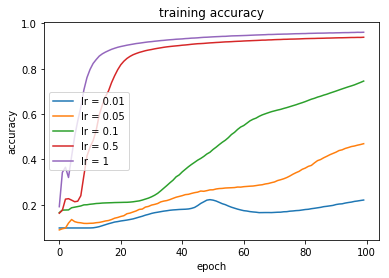

In [20]:
# 畫圖 accuracy as a function of epochs
plt.plot(model1_1.history["acc"])
plt.plot(model2_1.history["acc"])
plt.plot(model3_1.history["acc"])
plt.plot(model4_1.history["acc"])
plt.plot(model5_1.history["acc"])

plt.title("training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["lr = 0.01", "lr = 0.05", "lr = 0.1", "lr = 0.5", "lr = 1"], loc = "best")
plt.show()

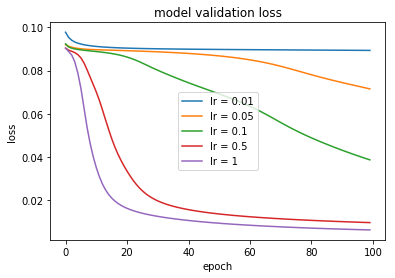

In [21]:
plt.plot(model1_1.history["loss"])
plt.plot(model2_1.history["loss"])
plt.plot(model3_1.history["loss"])
plt.plot(model4_1.history["loss"])
plt.plot(model5_1.history["loss"])

plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["lr = 0.01", "lr = 0.05", "lr = 0.1", "lr = 0.5", "lr = 1"], loc = "best")
plt.show()

# 心得

* 雖然 lr 越小能夠使結果較準確，但由結果可知 lr 的大小會影響正確率到達最大值的時間
* 在 epochs = 100 的情況可知，即使被認為應該最準確的 lr = 0.01 其正確率是所有中最低的
* 但為了確認 lr = 0.01 能夠達最大值，我們繼續加大其執行的 epochs

# 再繼續畫 lr = 0.01 的圖

* 再多加 2000 個 epochs, 看是否能達飽和值

In [22]:
model1_1 = model1.fit(x_train_st, y_train, batch_size=150, epochs=2000, verbose=1, validation_data=(x_test_st, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2000
60000/60000 [==============================] - 1s 21us/step - loss: 0.0893 - acc: 0.2230 - val_loss: 0.0893 - val_acc: 0.2295
Epoch 2/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0893 - acc: 0.2262 - val_loss: 0.0893 - val_acc: 0.2313
Epoch 3/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0893 - acc: 0.2275 - val_loss: 0.0893 - val_acc: 0.2342
Epoch 4/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0893 - acc: 0.2300 - val_loss: 0.0892 - val_acc: 0.2370
Epoch 5/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0893 - acc: 0.2317 - val_loss: 0.0892 - val_acc: 0.2396
Epoch 6/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0893 - acc: 0.2345 - val_loss: 0.0892 - val_acc: 0.2411
Epoch 7/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0892 - acc: 0.2368 - val_loss: 0.

Epoch 59/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0887 - acc: 0.3411 - val_loss: 0.0887 - val_acc: 0.3525
Epoch 60/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0887 - acc: 0.3441 - val_loss: 0.0887 - val_acc: 0.3537
Epoch 61/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0887 - acc: 0.3439 - val_loss: 0.0887 - val_acc: 0.3565
Epoch 62/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0887 - acc: 0.3472 - val_loss: 0.0887 - val_acc: 0.3583
Epoch 63/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0887 - acc: 0.3481 - val_loss: 0.0887 - val_acc: 0.3604
Epoch 64/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0887 - acc: 0.3509 - val_loss: 0.0887 - val_acc: 0.3626
Epoch 65/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0887 - acc: 0.3525 - val_loss: 0.0886 - val_acc: 0.3644
Epoch 66/2000
60000/

60000/60000 [==============================] - 1s 19us/step - loss: 0.0880 - acc: 0.4350 - val_loss: 0.0879 - val_acc: 0.4517
Epoch 118/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0880 - acc: 0.4366 - val_loss: 0.0879 - val_acc: 0.4528
Epoch 119/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0880 - acc: 0.4378 - val_loss: 0.0879 - val_acc: 0.4534
Epoch 120/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0879 - acc: 0.4385 - val_loss: 0.0879 - val_acc: 0.4541
Epoch 121/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0879 - acc: 0.4400 - val_loss: 0.0879 - val_acc: 0.4542
Epoch 122/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0879 - acc: 0.4406 - val_loss: 0.0878 - val_acc: 0.4551
Epoch 123/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0879 - acc: 0.4420 - val_loss: 0.0878 - val_acc: 0.4552
Epoch 124/2000
60000/60000 [

Epoch 175/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0868 - acc: 0.4702 - val_loss: 0.0868 - val_acc: 0.4790
Epoch 176/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0868 - acc: 0.4704 - val_loss: 0.0867 - val_acc: 0.4793
Epoch 177/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0868 - acc: 0.4709 - val_loss: 0.0867 - val_acc: 0.4800
Epoch 178/2000
60000/60000 [==============================] - 1s 21us/step - loss: 0.0868 - acc: 0.4709 - val_loss: 0.0867 - val_acc: 0.4800
Epoch 179/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0867 - acc: 0.4710 - val_loss: 0.0867 - val_acc: 0.4800
Epoch 180/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0867 - acc: 0.4717 - val_loss: 0.0866 - val_acc: 0.4799
Epoch 181/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0867 - acc: 0.4717 - val_loss: 0.0866 - val_acc: 0.4800
Epoch 182/200

60000/60000 [==============================] - 1s 19us/step - loss: 0.0850 - acc: 0.4795 - val_loss: 0.0849 - val_acc: 0.4862
Epoch 234/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0850 - acc: 0.4794 - val_loss: 0.0849 - val_acc: 0.4861
Epoch 235/2000
60000/60000 [==============================] - ETA: 0s - loss: 0.0849 - acc: 0.479 - 1s 19us/step - loss: 0.0849 - acc: 0.4798 - val_loss: 0.0848 - val_acc: 0.4860
Epoch 236/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0849 - acc: 0.4798 - val_loss: 0.0848 - val_acc: 0.4858
Epoch 237/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0849 - acc: 0.4796 - val_loss: 0.0848 - val_acc: 0.4854
Epoch 238/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0848 - acc: 0.4795 - val_loss: 0.0847 - val_acc: 0.4851
Epoch 239/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0848 - acc: 0.4796 - val_loss: 0.0847 - val_ac

Epoch 291/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0821 - acc: 0.4541 - val_loss: 0.0820 - val_acc: 0.4560
Epoch 292/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0821 - acc: 0.4534 - val_loss: 0.0819 - val_acc: 0.4552
Epoch 293/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0820 - acc: 0.4518 - val_loss: 0.0819 - val_acc: 0.4538
Epoch 294/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0819 - acc: 0.4510 - val_loss: 0.0818 - val_acc: 0.4530
Epoch 295/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0819 - acc: 0.4504 - val_loss: 0.0817 - val_acc: 0.4522
Epoch 296/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0818 - acc: 0.4490 - val_loss: 0.0817 - val_acc: 0.4508
Epoch 297/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0817 - acc: 0.4481 - val_loss: 0.0816 - val_acc: 0.4501
Epoch 298/200

60000/60000 [==============================] - 1s 19us/step - loss: 0.0777 - acc: 0.4141 - val_loss: 0.0775 - val_acc: 0.4142
Epoch 350/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0776 - acc: 0.4135 - val_loss: 0.0774 - val_acc: 0.4138
Epoch 351/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0775 - acc: 0.4136 - val_loss: 0.0773 - val_acc: 0.4132
Epoch 352/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0774 - acc: 0.4133 - val_loss: 0.0772 - val_acc: 0.4128
Epoch 353/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0773 - acc: 0.4133 - val_loss: 0.0771 - val_acc: 0.4128
Epoch 354/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0772 - acc: 0.4132 - val_loss: 0.0770 - val_acc: 0.4125
Epoch 355/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0771 - acc: 0.4131 - val_loss: 0.0769 - val_acc: 0.4123
Epoch 356/2000
60000/60000 [

60000/60000 [==============================] - 1s 19us/step - loss: 0.0719 - acc: 0.4312 - val_loss: 0.0717 - val_acc: 0.4273
Epoch 408/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0718 - acc: 0.4322 - val_loss: 0.0716 - val_acc: 0.4283
Epoch 409/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0717 - acc: 0.4327 - val_loss: 0.0715 - val_acc: 0.4301
Epoch 410/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0716 - acc: 0.4341 - val_loss: 0.0714 - val_acc: 0.4311
Epoch 411/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0715 - acc: 0.4349 - val_loss: 0.0713 - val_acc: 0.4316
Epoch 412/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0714 - acc: 0.4362 - val_loss: 0.0712 - val_acc: 0.4327
Epoch 413/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0713 - acc: 0.4372 - val_loss: 0.0711 - val_acc: 0.4339
Epoch 414/2000
60000/60000 [

60000/60000 [==============================] - 1s 19us/step - loss: 0.0657 - acc: 0.5230 - val_loss: 0.0655 - val_acc: 0.5213
Epoch 466/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0656 - acc: 0.5246 - val_loss: 0.0654 - val_acc: 0.5235
Epoch 467/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0655 - acc: 0.5266 - val_loss: 0.0653 - val_acc: 0.5258
Epoch 468/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0654 - acc: 0.5288 - val_loss: 0.0652 - val_acc: 0.5276
Epoch 469/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0653 - acc: 0.5307 - val_loss: 0.0651 - val_acc: 0.5298
Epoch 470/2000
60000/60000 [==============================] - 1s 21us/step - loss: 0.0651 - acc: 0.5321 - val_loss: 0.0649 - val_acc: 0.5321
Epoch 471/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0650 - acc: 0.5341 - val_loss: 0.0648 - val_acc: 0.5339
Epoch 472/2000
60000/60000 [

60000/60000 [==============================] - 1s 19us/step - loss: 0.0594 - acc: 0.6030 - val_loss: 0.0591 - val_acc: 0.6072
Epoch 524/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0593 - acc: 0.6039 - val_loss: 0.0590 - val_acc: 0.6081
Epoch 525/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0592 - acc: 0.6049 - val_loss: 0.0589 - val_acc: 0.6089
Epoch 526/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0590 - acc: 0.6061 - val_loss: 0.0588 - val_acc: 0.6096
Epoch 527/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0589 - acc: 0.6074 - val_loss: 0.0587 - val_acc: 0.6101
Epoch 528/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0588 - acc: 0.6084 - val_loss: 0.0586 - val_acc: 0.6114
Epoch 529/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0587 - acc: 0.6092 - val_loss: 0.0585 - val_acc: 0.6131
Epoch 530/2000
60000/60000 [

60000/60000 [==============================] - 1s 19us/step - loss: 0.0535 - acc: 0.6490 - val_loss: 0.0532 - val_acc: 0.6516
Epoch 582/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0534 - acc: 0.6499 - val_loss: 0.0531 - val_acc: 0.6520
Epoch 583/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0533 - acc: 0.6507 - val_loss: 0.0530 - val_acc: 0.6523
Epoch 584/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0532 - acc: 0.6514 - val_loss: 0.0529 - val_acc: 0.6531
Epoch 585/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0531 - acc: 0.6522 - val_loss: 0.0529 - val_acc: 0.6535
Epoch 586/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0531 - acc: 0.6529 - val_loss: 0.0528 - val_acc: 0.6540
Epoch 587/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0530 - acc: 0.6536 - val_loss: 0.0527 - val_acc: 0.6544
Epoch 588/2000
60000/60000 [

60000/60000 [==============================] - 1s 19us/step - loss: 0.0486 - acc: 0.6913 - val_loss: 0.0483 - val_acc: 0.6930
Epoch 640/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0485 - acc: 0.6922 - val_loss: 0.0482 - val_acc: 0.6937
Epoch 641/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0484 - acc: 0.6929 - val_loss: 0.0481 - val_acc: 0.6946
Epoch 642/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0484 - acc: 0.6938 - val_loss: 0.0480 - val_acc: 0.6952
Epoch 643/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0483 - acc: 0.6942 - val_loss: 0.0480 - val_acc: 0.6960
Epoch 644/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0482 - acc: 0.6946 - val_loss: 0.0479 - val_acc: 0.6966
Epoch 645/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0481 - acc: 0.6952 - val_loss: 0.0478 - val_acc: 0.6974
Epoch 646/2000
60000/60000 [

60000/60000 [==============================] - 1s 21us/step - loss: 0.0445 - acc: 0.7236 - val_loss: 0.0442 - val_acc: 0.7288
Epoch 698/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0444 - acc: 0.7240 - val_loss: 0.0441 - val_acc: 0.7298
Epoch 699/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0444 - acc: 0.7243 - val_loss: 0.0440 - val_acc: 0.7305
Epoch 700/2000
60000/60000 [==============================] - 1s 22us/step - loss: 0.0443 - acc: 0.7247 - val_loss: 0.0440 - val_acc: 0.7307
Epoch 701/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0443 - acc: 0.7253 - val_loss: 0.0439 - val_acc: 0.7309
Epoch 702/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0442 - acc: 0.7258 - val_loss: 0.0438 - val_acc: 0.7323
Epoch 703/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0441 - acc: 0.7265 - val_loss: 0.0438 - val_acc: 0.7327
Epoch 704/2000
60000/60000 [

60000/60000 [==============================] - 1s 19us/step - loss: 0.0410 - acc: 0.7471 - val_loss: 0.0406 - val_acc: 0.7545
Epoch 756/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0410 - acc: 0.7476 - val_loss: 0.0406 - val_acc: 0.7548
Epoch 757/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0409 - acc: 0.7479 - val_loss: 0.0405 - val_acc: 0.7553
Epoch 758/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0409 - acc: 0.7483 - val_loss: 0.0405 - val_acc: 0.7557
Epoch 759/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0408 - acc: 0.7485 - val_loss: 0.0404 - val_acc: 0.7561
Epoch 760/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0408 - acc: 0.7488 - val_loss: 0.0404 - val_acc: 0.7566
Epoch 761/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0407 - acc: 0.7491 - val_loss: 0.0403 - val_acc: 0.7571
Epoch 762/2000
60000/60000 [

60000/60000 [==============================] - 1s 18us/step - loss: 0.0380 - acc: 0.7641 - val_loss: 0.0376 - val_acc: 0.7722
Epoch 814/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0380 - acc: 0.7645 - val_loss: 0.0375 - val_acc: 0.7724
Epoch 815/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0379 - acc: 0.7648 - val_loss: 0.0375 - val_acc: 0.7724
Epoch 816/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0379 - acc: 0.7651 - val_loss: 0.0374 - val_acc: 0.7725
Epoch 817/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0378 - acc: 0.7653 - val_loss: 0.0374 - val_acc: 0.7725
Epoch 818/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0378 - acc: 0.7654 - val_loss: 0.0373 - val_acc: 0.7724
Epoch 819/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0377 - acc: 0.7657 - val_loss: 0.0373 - val_acc: 0.7724
Epoch 820/2000
60000/60000 [

60000/60000 [==============================] - 1s 19us/step - loss: 0.0353 - acc: 0.7824 - val_loss: 0.0348 - val_acc: 0.7889
Epoch 872/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0353 - acc: 0.7827 - val_loss: 0.0348 - val_acc: 0.7893
Epoch 873/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0352 - acc: 0.7830 - val_loss: 0.0347 - val_acc: 0.7895
Epoch 874/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0352 - acc: 0.7833 - val_loss: 0.0347 - val_acc: 0.7897
Epoch 875/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0351 - acc: 0.7836 - val_loss: 0.0347 - val_acc: 0.7903
Epoch 876/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0351 - acc: 0.7839 - val_loss: 0.0346 - val_acc: 0.7906
Epoch 877/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0350 - acc: 0.7842 - val_loss: 0.0346 - val_acc: 0.7908
Epoch 878/2000
60000/60000 [

60000/60000 [==============================] - 1s 19us/step - loss: 0.0329 - acc: 0.8039 - val_loss: 0.0324 - val_acc: 0.8105
Epoch 930/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0328 - acc: 0.8044 - val_loss: 0.0323 - val_acc: 0.8104
Epoch 931/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0328 - acc: 0.8047 - val_loss: 0.0323 - val_acc: 0.8109
Epoch 932/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0327 - acc: 0.8052 - val_loss: 0.0322 - val_acc: 0.8109
Epoch 933/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0327 - acc: 0.8056 - val_loss: 0.0322 - val_acc: 0.8117
Epoch 934/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0327 - acc: 0.8060 - val_loss: 0.0322 - val_acc: 0.8119
Epoch 935/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0326 - acc: 0.8063 - val_loss: 0.0321 - val_acc: 0.8122
Epoch 936/2000
60000/60000 [

60000/60000 [==============================] - 1s 19us/step - loss: 0.0307 - acc: 0.8240 - val_loss: 0.0301 - val_acc: 0.8314
Epoch 988/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0306 - acc: 0.8242 - val_loss: 0.0301 - val_acc: 0.8317
Epoch 989/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0306 - acc: 0.8244 - val_loss: 0.0300 - val_acc: 0.8318
Epoch 990/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0306 - acc: 0.8247 - val_loss: 0.0300 - val_acc: 0.8323
Epoch 991/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0305 - acc: 0.8251 - val_loss: 0.0300 - val_acc: 0.8324
Epoch 992/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0305 - acc: 0.8254 - val_loss: 0.0299 - val_acc: 0.8326
Epoch 993/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0304 - acc: 0.8257 - val_loss: 0.0299 - val_acc: 0.8331
Epoch 994/2000
60000/60000 [

Epoch 1045/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0287 - acc: 0.8393 - val_loss: 0.0281 - val_acc: 0.8473
Epoch 1046/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0287 - acc: 0.8395 - val_loss: 0.0281 - val_acc: 0.8476
Epoch 1047/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0286 - acc: 0.8398 - val_loss: 0.0281 - val_acc: 0.8478
Epoch 1048/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0286 - acc: 0.8401 - val_loss: 0.0280 - val_acc: 0.8478
Epoch 1049/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0286 - acc: 0.8401 - val_loss: 0.0280 - val_acc: 0.8480
Epoch 1050/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0285 - acc: 0.8403 - val_loss: 0.0280 - val_acc: 0.8481
Epoch 1051/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0285 - acc: 0.8406 - val_loss: 0.0279 - val_acc: 0.8484
Epoch 

60000/60000 [==============================] - 1s 19us/step - loss: 0.0270 - acc: 0.8499 - val_loss: 0.0264 - val_acc: 0.8600
Epoch 1103/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0270 - acc: 0.8503 - val_loss: 0.0264 - val_acc: 0.8598
Epoch 1104/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0269 - acc: 0.8504 - val_loss: 0.0263 - val_acc: 0.8600
Epoch 1105/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0269 - acc: 0.8506 - val_loss: 0.0263 - val_acc: 0.8601
Epoch 1106/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0269 - acc: 0.8507 - val_loss: 0.0263 - val_acc: 0.8600
Epoch 1107/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0268 - acc: 0.8509 - val_loss: 0.0262 - val_acc: 0.8599
Epoch 1108/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0268 - acc: 0.8510 - val_loss: 0.0262 - val_acc: 0.8598
Epoch 1109/2000
60000/

Epoch 1160/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0255 - acc: 0.8589 - val_loss: 0.0248 - val_acc: 0.8660
Epoch 1161/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0254 - acc: 0.8591 - val_loss: 0.0248 - val_acc: 0.8662
Epoch 1162/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0254 - acc: 0.8592 - val_loss: 0.0248 - val_acc: 0.8663
Epoch 1163/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0254 - acc: 0.8592 - val_loss: 0.0248 - val_acc: 0.8666
Epoch 1164/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0254 - acc: 0.8594 - val_loss: 0.0247 - val_acc: 0.8668
Epoch 1165/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0253 - acc: 0.8596 - val_loss: 0.0247 - val_acc: 0.8670
Epoch 1166/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0253 - acc: 0.8597 - val_loss: 0.0247 - val_acc: 0.8669
Epoch 

60000/60000 [==============================] - 1s 20us/step - loss: 0.0241 - acc: 0.8652 - val_loss: 0.0235 - val_acc: 0.8734
Epoch 1218/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0241 - acc: 0.8653 - val_loss: 0.0235 - val_acc: 0.8733
Epoch 1219/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0241 - acc: 0.8654 - val_loss: 0.0235 - val_acc: 0.8733
Epoch 1220/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0241 - acc: 0.8656 - val_loss: 0.0234 - val_acc: 0.8733
Epoch 1221/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0240 - acc: 0.8657 - val_loss: 0.0234 - val_acc: 0.8735
Epoch 1222/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0240 - acc: 0.8657 - val_loss: 0.0234 - val_acc: 0.8735
Epoch 1223/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0240 - acc: 0.8658 - val_loss: 0.0234 - val_acc: 0.8737
Epoch 1224/2000
60000/

Epoch 1275/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0229 - acc: 0.8706 - val_loss: 0.0223 - val_acc: 0.8784
Epoch 1276/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0229 - acc: 0.8707 - val_loss: 0.0223 - val_acc: 0.8784
Epoch 1277/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0229 - acc: 0.8707 - val_loss: 0.0223 - val_acc: 0.8784
Epoch 1278/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0229 - acc: 0.8708 - val_loss: 0.0222 - val_acc: 0.8785
Epoch 1279/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0229 - acc: 0.8710 - val_loss: 0.0222 - val_acc: 0.8785
Epoch 1280/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0229 - acc: 0.8710 - val_loss: 0.0222 - val_acc: 0.8786
Epoch 1281/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0228 - acc: 0.8712 - val_loss: 0.0222 - val_acc: 0.8788
Epoch 

60000/60000 [==============================] - 1s 19us/step - loss: 0.0219 - acc: 0.8757 - val_loss: 0.0213 - val_acc: 0.8810
Epoch 1333/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0219 - acc: 0.8757 - val_loss: 0.0212 - val_acc: 0.8810
Epoch 1334/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0219 - acc: 0.8759 - val_loss: 0.0212 - val_acc: 0.8812
Epoch 1335/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0219 - acc: 0.8759 - val_loss: 0.0212 - val_acc: 0.8813
Epoch 1336/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0218 - acc: 0.8759 - val_loss: 0.0212 - val_acc: 0.8812
Epoch 1337/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0218 - acc: 0.8761 - val_loss: 0.0212 - val_acc: 0.8812
Epoch 1338/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0218 - acc: 0.8761 - val_loss: 0.0212 - val_acc: 0.8812
Epoch 1339/2000
60000/

Epoch 1390/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0210 - acc: 0.8805 - val_loss: 0.0203 - val_acc: 0.8845
Epoch 1391/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0210 - acc: 0.8805 - val_loss: 0.0203 - val_acc: 0.8845
Epoch 1392/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0209 - acc: 0.8806 - val_loss: 0.0203 - val_acc: 0.8846
Epoch 1393/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0209 - acc: 0.8807 - val_loss: 0.0203 - val_acc: 0.8847
Epoch 1394/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0209 - acc: 0.8806 - val_loss: 0.0203 - val_acc: 0.8848
Epoch 1395/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0209 - acc: 0.8807 - val_loss: 0.0202 - val_acc: 0.8848
Epoch 1396/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0209 - acc: 0.8807 - val_loss: 0.0202 - val_acc: 0.8849
Epoch 

60000/60000 [==============================] - 1s 18us/step - loss: 0.0202 - acc: 0.8840 - val_loss: 0.0195 - val_acc: 0.8876
Epoch 1448/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0201 - acc: 0.8841 - val_loss: 0.0195 - val_acc: 0.8876
Epoch 1449/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0201 - acc: 0.8842 - val_loss: 0.0195 - val_acc: 0.8876
Epoch 1450/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0201 - acc: 0.8842 - val_loss: 0.0195 - val_acc: 0.8876
Epoch 1451/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0201 - acc: 0.8843 - val_loss: 0.0195 - val_acc: 0.8876
Epoch 1452/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0201 - acc: 0.8843 - val_loss: 0.0194 - val_acc: 0.8877
Epoch 1453/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0201 - acc: 0.8844 - val_loss: 0.0194 - val_acc: 0.8877
Epoch 1454/2000
60000/

Epoch 1505/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0194 - acc: 0.8875 - val_loss: 0.0188 - val_acc: 0.8895
Epoch 1506/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0194 - acc: 0.8876 - val_loss: 0.0188 - val_acc: 0.8895
Epoch 1507/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0194 - acc: 0.8876 - val_loss: 0.0188 - val_acc: 0.8896
Epoch 1508/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0194 - acc: 0.8876 - val_loss: 0.0187 - val_acc: 0.8896
Epoch 1509/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0194 - acc: 0.8876 - val_loss: 0.0187 - val_acc: 0.8898
Epoch 1510/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0193 - acc: 0.8878 - val_loss: 0.0187 - val_acc: 0.8898
Epoch 1511/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0193 - acc: 0.8878 - val_loss: 0.0187 - val_acc: 0.8899
Epoch 

60000/60000 [==============================] - 1s 19us/step - loss: 0.0187 - acc: 0.8900 - val_loss: 0.0181 - val_acc: 0.8938
Epoch 1563/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0187 - acc: 0.8900 - val_loss: 0.0181 - val_acc: 0.8938
Epoch 1564/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0187 - acc: 0.8901 - val_loss: 0.0181 - val_acc: 0.8938
Epoch 1565/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0187 - acc: 0.8902 - val_loss: 0.0181 - val_acc: 0.8938
Epoch 1566/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0187 - acc: 0.8902 - val_loss: 0.0181 - val_acc: 0.8939
Epoch 1567/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0187 - acc: 0.8903 - val_loss: 0.0181 - val_acc: 0.8939
Epoch 1568/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0187 - acc: 0.8903 - val_loss: 0.0181 - val_acc: 0.8940
Epoch 1569/2000
60000/

Epoch 1620/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0181 - acc: 0.8929 - val_loss: 0.0176 - val_acc: 0.8967
Epoch 1621/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0181 - acc: 0.8929 - val_loss: 0.0175 - val_acc: 0.8967
Epoch 1622/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0181 - acc: 0.8929 - val_loss: 0.0175 - val_acc: 0.8967
Epoch 1623/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0181 - acc: 0.8931 - val_loss: 0.0175 - val_acc: 0.8968
Epoch 1624/2000
60000/60000 [==============================] - 1s 18us/step - loss: 0.0181 - acc: 0.8931 - val_loss: 0.0175 - val_acc: 0.8969
Epoch 1625/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0181 - acc: 0.8931 - val_loss: 0.0175 - val_acc: 0.8969
Epoch 1626/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0181 - acc: 0.8931 - val_loss: 0.0175 - val_acc: 0.8970
Epoch 

60000/60000 [==============================] - 2s 28us/step - loss: 0.0176 - acc: 0.8953 - val_loss: 0.0170 - val_acc: 0.8993
Epoch 1678/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0176 - acc: 0.8953 - val_loss: 0.0170 - val_acc: 0.8993
Epoch 1679/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0176 - acc: 0.8954 - val_loss: 0.0170 - val_acc: 0.8993
Epoch 1680/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0176 - acc: 0.8954 - val_loss: 0.0170 - val_acc: 0.8993
Epoch 1681/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0176 - acc: 0.8955 - val_loss: 0.0170 - val_acc: 0.8995
Epoch 1682/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0176 - acc: 0.8955 - val_loss: 0.0170 - val_acc: 0.8997
Epoch 1683/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0175 - acc: 0.8955 - val_loss: 0.0170 - val_acc: 0.8997
Epoch 1684/2000
60000/

Epoch 1735/2000
60000/60000 [==============================] - 1s 22us/step - loss: 0.0171 - acc: 0.8977 - val_loss: 0.0166 - val_acc: 0.9015
Epoch 1736/2000
60000/60000 [==============================] - 2s 29us/step - loss: 0.0171 - acc: 0.8977 - val_loss: 0.0166 - val_acc: 0.9015
Epoch 1737/2000
60000/60000 [==============================] - 2s 29us/step - loss: 0.0171 - acc: 0.8977 - val_loss: 0.0166 - val_acc: 0.9015
Epoch 1738/2000
60000/60000 [==============================] - 2s 29us/step - loss: 0.0171 - acc: 0.8977 - val_loss: 0.0165 - val_acc: 0.9016
Epoch 1739/2000
60000/60000 [==============================] - 1s 24us/step - loss: 0.0171 - acc: 0.8978 - val_loss: 0.0165 - val_acc: 0.9018
Epoch 1740/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0171 - acc: 0.8979 - val_loss: 0.0165 - val_acc: 0.9018
Epoch 1741/2000
60000/60000 [==============================] - 1s 23us/step - loss: 0.0171 - acc: 0.8979 - val_loss: 0.0165 - val_acc: 0.9018
Epoch 

60000/60000 [==============================] - 1s 20us/step - loss: 0.0167 - acc: 0.8997 - val_loss: 0.0162 - val_acc: 0.9031
Epoch 1793/2000
60000/60000 [==============================] - 1s 21us/step - loss: 0.0167 - acc: 0.8998 - val_loss: 0.0161 - val_acc: 0.9032
Epoch 1794/2000
60000/60000 [==============================] - 1s 22us/step - loss: 0.0166 - acc: 0.8998 - val_loss: 0.0161 - val_acc: 0.9031
Epoch 1795/2000
60000/60000 [==============================] - 1s 22us/step - loss: 0.0166 - acc: 0.8999 - val_loss: 0.0161 - val_acc: 0.9033
Epoch 1796/2000
60000/60000 [==============================] - 1s 23us/step - loss: 0.0166 - acc: 0.8999 - val_loss: 0.0161 - val_acc: 0.9033
Epoch 1797/2000
60000/60000 [==============================] - 1s 22us/step - loss: 0.0166 - acc: 0.8999 - val_loss: 0.0161 - val_acc: 0.9033
Epoch 1798/2000
60000/60000 [==============================] - 1s 23us/step - loss: 0.0166 - acc: 0.9000 - val_loss: 0.0161 - val_acc: 0.9034
Epoch 1799/2000
60000/

60000/60000 [==============================] - 1s 20us/step - loss: 0.0163 - acc: 0.9017 - val_loss: 0.0158 - val_acc: 0.9046
Epoch 1850/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0163 - acc: 0.9017 - val_loss: 0.0158 - val_acc: 0.9046
Epoch 1851/2000
60000/60000 [==============================] - 1s 23us/step - loss: 0.0162 - acc: 0.9018 - val_loss: 0.0158 - val_acc: 0.9046
Epoch 1852/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0162 - acc: 0.9018 - val_loss: 0.0158 - val_acc: 0.9046
Epoch 1853/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0162 - acc: 0.9018 - val_loss: 0.0157 - val_acc: 0.9048
Epoch 1854/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0162 - acc: 0.9018 - val_loss: 0.0157 - val_acc: 0.9048
Epoch 1855/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0162 - acc: 0.9018 - val_loss: 0.0157 - val_acc: 0.9048
Epoch 1856/2000
60000/

Epoch 1907/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0159 - acc: 0.9037 - val_loss: 0.0154 - val_acc: 0.9068
Epoch 1908/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0159 - acc: 0.9037 - val_loss: 0.0154 - val_acc: 0.9069
Epoch 1909/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0159 - acc: 0.9037 - val_loss: 0.0154 - val_acc: 0.9070
Epoch 1910/2000
60000/60000 [==============================] - 1s 20us/step - loss: 0.0159 - acc: 0.9039 - val_loss: 0.0154 - val_acc: 0.9071
Epoch 1911/2000
60000/60000 [==============================] - 1s 21us/step - loss: 0.0159 - acc: 0.9039 - val_loss: 0.0154 - val_acc: 0.9071
Epoch 1912/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0159 - acc: 0.9039 - val_loss: 0.0154 - val_acc: 0.9072
Epoch 1913/2000
60000/60000 [==============================] - 1s 23us/step - loss: 0.0158 - acc: 0.9039 - val_loss: 0.0154 - val_acc: 0.9071
Epoch 

60000/60000 [==============================] - 1s 19us/step - loss: 0.0155 - acc: 0.9056 - val_loss: 0.0151 - val_acc: 0.9084
Epoch 1965/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0155 - acc: 0.9057 - val_loss: 0.0151 - val_acc: 0.9085
Epoch 1966/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0155 - acc: 0.9057 - val_loss: 0.0151 - val_acc: 0.9086
Epoch 1967/2000
60000/60000 [==============================] - 1s 21us/step - loss: 0.0155 - acc: 0.9058 - val_loss: 0.0151 - val_acc: 0.9087
Epoch 1968/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0155 - acc: 0.9057 - val_loss: 0.0151 - val_acc: 0.9089
Epoch 1969/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0155 - acc: 0.9059 - val_loss: 0.0151 - val_acc: 0.9089
Epoch 1970/2000
60000/60000 [==============================] - 1s 19us/step - loss: 0.0155 - acc: 0.9058 - val_loss: 0.0151 - val_acc: 0.9090
Epoch 1971/2000
60000/

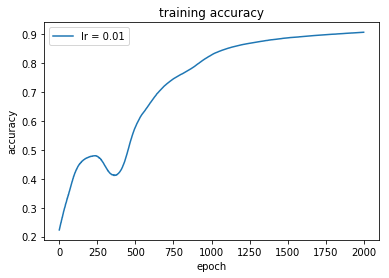

In [23]:
# 畫圖 accuracy as a function of epochs
plt.plot(model1_1.history["acc"])

plt.title("training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["lr = 0.01"], loc = "best")
plt.show()

* 能發現即使到了 epoch = 2000 正確率已到了 0.9067 仍有些微上升的趨勢, 因此很可能會趨於最大的正確率。
* 但對於較大的 lr 來說它能很快的達到差不多的正確率, 因此可了解到並不是 lr 越小越好, 在時間及正確率的評估下應選擇一個正確率不會下降太多但達到最大值的 epoch 能越少越好